In [2]:
# Install GeoPandas (run this cell only if GeoPandas is not already installed)
# !pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
# Loading vector data (Shapefile and GeoJSON)
def load_vector_data():
    gdf_shapefile = gpd.read_file('./vector_lab_data/mea_on_32647.shp')
    gdf_geojson = gpd.read_file('./vector_lab_data/geo_str_32647.geojson')
    return gdf_shapefile, gdf_geojson

In [6]:
# Load example data
gdf_shapefile, gdf_geojson = load_vector_data()

In [7]:
# Basic data exploration
def explore_data(gdf):
    print(gdf.head())
    print(gdf.describe())
    gdf.plot()
    plt.show()

           AREA AMP_CODE     AMP_NAM_T           AMP_NAM_E PROV_CODE  \
0  4.692389e+08     5023  กิ่งอ.แม่ออน  King Amphoe Mae On        50   

                                            geometry  
0  POLYGON ((524165.587 2072504.281, 524152.402 2...  
               AREA
count  1.000000e+00
mean   4.692389e+08
std             NaN
min    4.692389e+08
25%    4.692389e+08
50%    4.692389e+08
75%    4.692389e+08
max    4.692389e+08


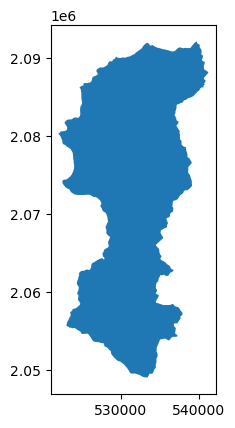

In [8]:
# Explore the data
explore_data(gdf_shapefile)

In [9]:
# Geometric operations
def geometric_operations(gdf):
    gdf['centroid'] = gdf['geometry'].centroid
    gdf['buffer'] = gdf['geometry'].buffer(1000)
    gdf['area'] = gdf['geometry'].area
    return gdf

In [10]:
# Perform geometric operations
gdf_with_operations = geometric_operations(gdf_shapefile)

print(gdf_with_operations.head())

           AREA AMP_CODE     AMP_NAM_T           AMP_NAM_E PROV_CODE  \
0  4.692389e+08     5023  กิ่งอ.แม่ออน  King Amphoe Mae On        50   

                                            geometry  \
0  POLYGON ((524165.587 2072504.281, 524152.402 2...   

                        centroid  \
0  POINT (531462.81 2072481.964)   

                                              buffer          area  
0  POLYGON ((521409.434 2081065.891, 521409.247 2...  4.692389e+08  


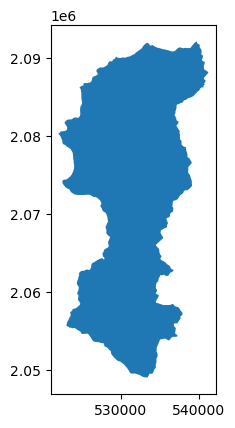

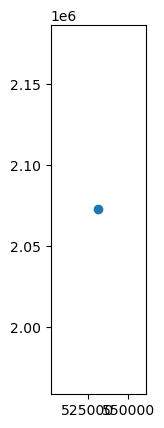

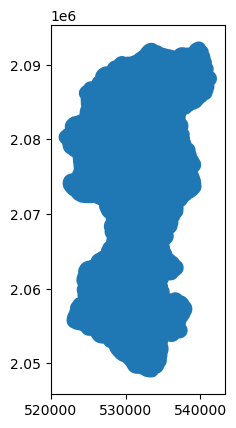

In [11]:
# display the data
gdf_with_operations.plot()
plt.show()

# display centroid
gdf_with_operations['centroid'].plot()
plt.show()

# display buffer
gdf_with_operations['buffer'].plot()
plt.show()


In [12]:
# Spatial relationships
def spatial_relationships(gdf1, gdf2):
    union_gdf2 = gdf2.union_all()
    intersects = gdf1.intersects(union_gdf2)
    within = gdf1.within(union_gdf2)
    contains = gdf1.contains(union_gdf2)
    return intersects, within, contains


     LENGTH STC_TYPE                         DESC_T             DESC_E  \
0    57.179      106            รอยเลื่อนและลายเส้น  Approximate fault   
1  3964.126      106            รอยเลื่อนและลายเส้น  Approximate fault   
2  1112.130      101  รอยเลื่อนที่ปรากฏอย่างเด่นชัด    Fault, accurate   
3   105.699      106            รอยเลื่อนและลายเส้น  Approximate fault   
4   222.466      101  รอยเลื่อนที่ปรากฏอย่างเด่นชัด    Fault, accurate   

                                            geometry  
0  MULTILINESTRING ((527563.844 2053554.63, 52754...  
1  MULTILINESTRING ((527541.424 2053502.03, 52753...  
2  MULTILINESTRING ((540986.218 2088350.771, 5409...  
3  MULTILINESTRING ((534537.182 2059903.162, 5345...  
4  MULTILINESTRING ((540739.245 2088022.22, 54060...  
            LENGTH
count    31.000000
mean   1522.855516
std    1445.289094
min      43.570000
25%     389.214000
50%    1099.284000
75%    2582.845500
max    4823.953000


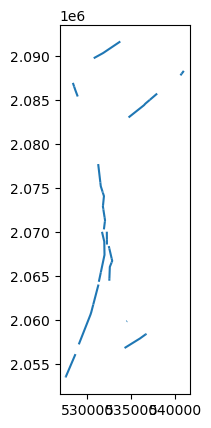

In [13]:
explore_data(gdf_geojson)

In [20]:
# Perform spatial relationships analysis
intersects, within, contains = spatial_relationships(gdf_geojson, gdf_shapefile)

# Display the results
print(intersects)
print(within)
print(contains)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
29    True
30    True
dtype: bool
0      True
1     False
2      True
3     False
4      True
5      True
6     False
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
dtype: bool
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False

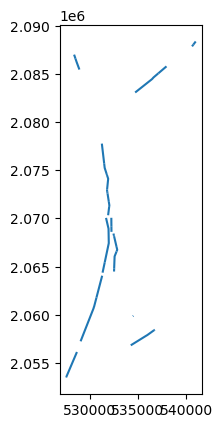

In [23]:
# print(gdf_shapefile[intersects])

# plot the data
gdf_geojson[within].plot()
plt.show()

In [24]:
# Data manipulation
def manipulate_data(gdf):
    gdf['new_column'] = gdf['geometry'].area
    gdf_filtered = gdf[gdf['new_column'] > 1000]
    return gdf_filtered

In [25]:
# Manipulate the data
gdf_filtered = manipulate_data(gdf_shapefile)

# Display hdf filtered
print(gdf_filtered.head())

           AREA AMP_CODE     AMP_NAM_T           AMP_NAM_E PROV_CODE  \
0  4.692389e+08     5023  กิ่งอ.แม่ออน  King Amphoe Mae On        50   

                                            geometry  \
0  POLYGON ((524165.587 2072504.281, 524152.402 2...   

                        centroid  \
0  POINT (531462.81 2072481.964)   

                                              buffer          area  \
0  POLYGON ((521409.434 2081065.891, 521409.247 2...  4.692389e+08   

     new_column  
0  4.692389e+08  


In [26]:
# Spatial joins
def spatial_joins(gdf1, gdf2):
    gdf_joined = gpd.sjoin(gdf1, gdf2, how='inner', predicate='intersects')
    return gdf_joined

In [27]:
# Perform spatial joins
gdf_joined = spatial_joins(gdf_shapefile, gdf_geojson)

In [28]:
print(gdf_joined.columns)
print(gdf_joined.head())

Index(['AREA', 'AMP_CODE', 'AMP_NAM_T', 'AMP_NAM_E', 'PROV_CODE', 'geometry',
       'centroid', 'buffer', 'area', 'new_column', 'index_right', 'LENGTH',
       'STC_TYPE', 'DESC_T', 'DESC_E'],
      dtype='object')
           AREA AMP_CODE     AMP_NAM_T           AMP_NAM_E PROV_CODE  \
0  4.692389e+08     5023  กิ่งอ.แม่ออน  King Amphoe Mae On        50   
0  4.692389e+08     5023  กิ่งอ.แม่ออน  King Amphoe Mae On        50   
0  4.692389e+08     5023  กิ่งอ.แม่ออน  King Amphoe Mae On        50   
0  4.692389e+08     5023  กิ่งอ.แม่ออน  King Amphoe Mae On        50   
0  4.692389e+08     5023  กิ่งอ.แม่ออน  King Amphoe Mae On        50   

                                            geometry  \
0  POLYGON ((524165.587 2072504.281, 524152.402 2...   
0  POLYGON ((524165.587 2072504.281, 524152.402 2...   
0  POLYGON ((524165.587 2072504.281, 524152.402 2...   
0  POLYGON ((524165.587 2072504.281, 524152.402 2...   
0  POLYGON ((524165.587 2072504.281, 524152.402 2...   

              

In [29]:
# Coordinate Reference Systems (CRS)
def set_crs(gdf, crs="EPSG:32647"):
    gdf = gdf.set_crs(crs)
    return gdf

In [30]:
def reproject_crs(gdf, crs="EPSG:3857"):
    gdf = gdf.to_crs(crs)
    return gdf

In [31]:
# Set and reproject CRS
gdf_crs_set = set_crs(gdf_shapefile)
gdf_reprojected = reproject_crs(gdf_shapefile, "EPSG:4326")

# Display CRS
print(gdf_crs_set.crs)
print(gdf_reprojected.crs)

EPSG:32647
EPSG:4326


In [32]:
# Saving data
def save_data(gdf, filepath, driver="ESRI Shapefile"):
    gdf.to_file(filepath, driver=driver)

In [37]:
# remove columns
gdf_shapefile = gdf_shapefile.drop(columns=['centroid'])

print(gdf_shapefile.head())

           AREA AMP_CODE     AMP_NAM_T           AMP_NAM_E PROV_CODE  \
0  4.692389e+08     5023  กิ่งอ.แม่ออน  King Amphoe Mae On        50   

                                            geometry          area  \
0  POLYGON ((524165.587 2072504.281, 524152.402 2...  4.692389e+08   

     new_column  
0  4.692389e+08  


In [38]:
# Save the data as a shapefile
save_data(gdf_shapefile, 'output_file.shp')

# Save the data as a GeoJSON file
save_data(gdf_shapefile, 'output_file.geojson', driver="GeoJSON")

/opt/homebrew/Caskroom/miniconda/base/envs/geo/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Normalized/laundered field name: 'area' to 'area_1'
  ogr_write(
/opt/homebrew/Caskroom/miniconda/base/envs/geo/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value 469238881.498000026 of field AREA of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/homebrew/Caskroom/miniconda/base/envs/geo/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value 469238881.497777641 of field area_1 of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/homebrew/Caskroom/miniconda/base/envs/geo/lib/python3.12/site-packages/pyogrio/raw.py:709: RuntimeWarning: Value 469238881.497777641 of field new_column of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(


In [56]:
# Practical examples
def create_buffer(gdf, distance=10):
    gdf['buffer'] = gdf['geometry'].buffer(distance)
    return gdf

In [121]:
def find_intersections(gdf1, gdf2):
    intersections = gpd.overlay(gdf1, gdf2, how='intersection')
    return intersections

In [118]:
def calculate_areas(gdf):
    gdf['area'] = gdf['geometry'].area
    return gdf

In [ ]:
# Practical examples
gdf_buffer = create_buffer(gdf_shapefile)
gdf_intersections = find_intersections(gdf_shapefile, gdf_geojson)
gdf_areas = calculate_areas(gdf_geojson)

# display the data
gdf_buffer.plot()
plt.show()

# display the data
# gdf_intersections.plot()
# plt.show()

# display area data
print(gdf_areas.head())


In [61]:
# Advanced analysis
def overlay_operations(gdf1, gdf2, operation='union'):
    gdf_overlay = gpd.overlay(gdf1, gdf2, how=operation)
    return gdf_overlay

In [ ]:
# Advanced analysis
gdf_overlay = overlay_operations(gdf_shapefile, gdf_geojson)

# display the data
gdf_overlay.plot()
plt.show()

In [125]:
# Visualization
def plot_data(gdf):
    gdf.plot()
    plt.show()

In [65]:
def customize_plot(gdf, color='blue', title='Geopandas Plot'):
    ax = gdf.plot(color=color)
    plt.title(title)
    plt.show()

In [ ]:
# Visualization
plot_data(gdf_shapefile)
customize_plot(gdf_shapefile, color='green', title='Customized Plot')

In [127]:
# Case Study (Example code for case study analysis)
def case_study_analysis(gdf1, gdf2):
    # This is a placeholder for the case study analysis code
    # Example: Merging data and calculating new metrics
    gdf_merged = gpd.sjoin(gdf1, gdf2, how='inner', op='intersects')
    gdf_merged['new_metric'] = gdf_merged['attribute1'] / gdf_merged['attribute2']
    return gdf_merged